In [12]:
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "confirmed"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [37]:
CSV_PATH = 'clean_caba_cases.csv' 

covid_confirmed = pd.read_csv(CSV_PATH, sep='\t')
covid_confirmed.drop(covid_confirmed.tail(1).index,inplace=True) # drop last row
covid_confirmed = covid_confirmed.iloc[::-1]
covid_confirmed.head()

,Date,New_Cases
180,7/20/2019,1
179,7/24/2019,1
178,7/30/2019,1
177,8/14/2019,1
176,2/16/2020,1


In [47]:
date = covid_confirmed.iloc[:,0]
confirmed_by_date = covid_confirmed.iloc[:,1]

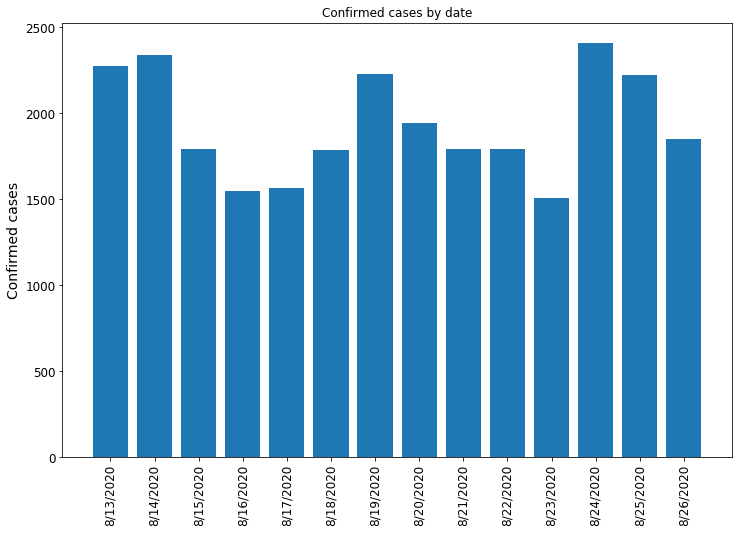

In [57]:
y_pos = np.arange(len(date))

two_weeks_dates = date[-14:]
two_weeks_cases = confirmed_by_date[-14:]

plt.figure(num=1, figsize=(12, 8))  
plt.bar(y_pos[-14:], two_weeks_cases)
plt.xticks(y_pos[-14:], two_weeks_dates, rotation='vertical')
plt.ylabel('Confirmed cases')
plt.title('Confirmed cases by date')

#save_fig('Casos - Histograma diario')
plt.show()

In [58]:
#Since the curve is exponencial, or so they say
y = np.log(confirmed_by_date)
X = [[i] for i in range(1, len(y)+1)]

[0, 186, 0, 3146.0000000000005]

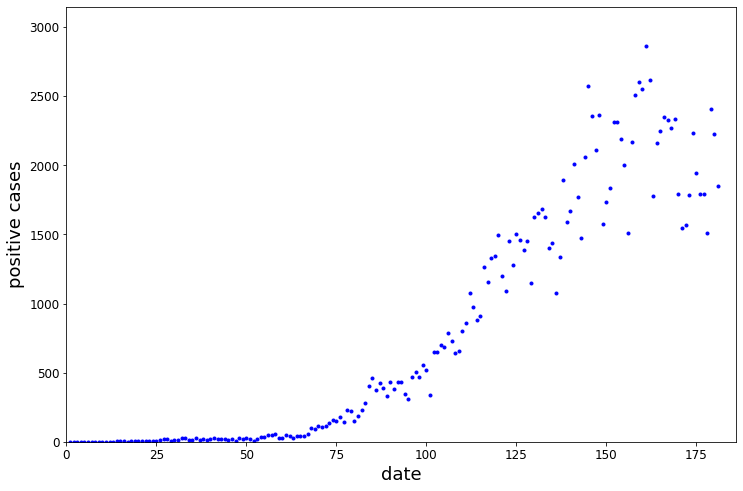

In [67]:
plt.figure(num=2, figsize=(12, 8)) 
plt.plot(X, confirmed_by_date, "b.")
plt.xlabel("date", fontsize=18)
plt.ylabel("positive cases", rotation=90, fontsize=18)
plt.axis([0, len(y)+5, 0, max(confirmed_by_date)*1.1])

[0, 186, 0, 8.754434594195288]

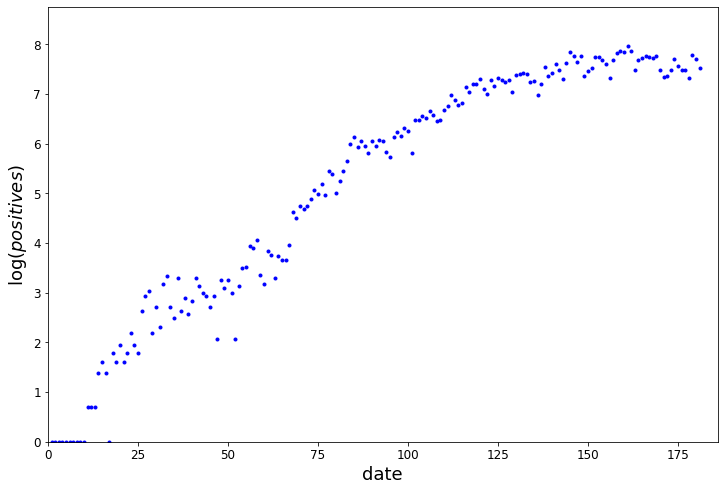

In [68]:
plt.figure(num=2, figsize=(12, 8)) 
plt.plot(X, y, "b.")
plt.xlabel("date", fontsize=18)
plt.ylabel("$\log(positive cases)$", rotation=90, fontsize=18)
plt.axis([0, len(y)+5, 0, max(y)*1.1])